In [5]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

In [13]:
with open('../dump/icsd.txt') as f:
    lines = f.read().split('\n')

contents = []
for i, line in enumerate(lines):
    if line == 'download item as cif file':
        contents.append({
            'sg':lines[i+1],
            'comp':lines[i+2],
            'title':lines[i+3],
            'author':lines[i+4],
            'journal':lines[i+5],
            'year':lines[i+6],
        })
    else:
        continue

In [55]:
by_journal = {}
for c in contents:
    journal = c['journal'].split('(')[0]
    if journal not in by_journal: by_journal[journal] = []
    info = c['journal'].replace(journal,'')
    by_journal[journal].append(info)
import json
with open('../dump/icsd_by_journal.json','w') as f:
    json.dump(by_journal, f)
#for k,v in sorted(by_journal.items(), key=lambda x: len(x[1]), reverse=True):
#    print(k)
#    for _v in sorted(v):
#        print('\t',_v)
#    print()

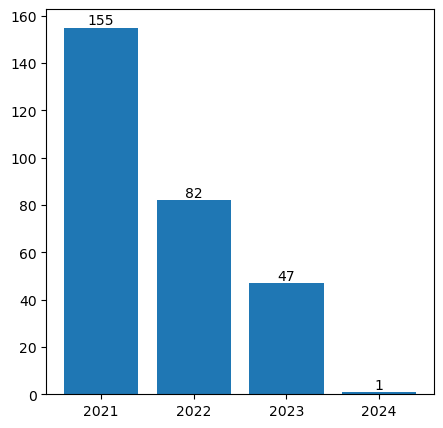

In [54]:
y, c = np.unique([int(c['year']) for c in contents], return_counts=True)
f, ax = plt.subplots(1,1,figsize=(5, 5))
bar = ax.bar(y, c, )
ax.bar_label(bar)
ax.set_xticks([2021, 2022, 2023, 2024])

In [58]:
for k, v in by_journal.items():
    print(k, len(np.unique(v)), len(v))

Angewandte Chemie, International Edition  10 10
Dalton Transactions  20 20
Chemistry of Materials  27 30
Materials Chemistry and Physics  3 4
Inorganic Chemistry  35 36
Zeitschrift fuer Anorganische und Allgemeine Chemie  10 10
Mineralogical Magazine  6 6
Journal of Alloys and Compounds  29 30
American Mineralogist  9 10
Journal of Solid State Chemistry  19 21
Physics and Chemistry of Minerals  2 2
Acta Crystallographica, Section B: Structural Science, Crystal Engineering and Materials  5 5
Inorganic Chemistry Communications  1 1
Minerals  6 7
Journal of Superconductivity and Novel Magnetism  4 5
Zeitschrift fuer Kristallographie - Crystalline Materials  5 6
Physical Review Materials  3 7
Crystals  2 2
Science China Materials  1 1
Journal of Magnetism and Magnetic Materials  2 2
Crystal Growth & Design  1 1
Physical Review B  4 5
Ceramics International  1 2
Advanced Functional Materials  1 1
Journal of the American Chemical Society  8 10
Acta Materialia  3 3
Chemistry - A European Jour

In [101]:
import re
year = re.compile(r'\(2\d{3}\)')
vol  = re.compile(r'\(\d\)')

f = open('../dump/journal_log.txt','w')
for k, v in sorted(by_journal.items(), key=lambda x: len(x[1]), reverse=True):
    y0 = '(2021)'
    vs = []
    f.write('\n')
    f.write(f'{k}\n')
    for _v in v:
        match = vol.search(_v)
        if match is None: 
            vs.append(_v)
            continue
        i = match.span()[0]
        vs.append(_v[:i+1] + ' ' + _v[i+1:])
    i = 0
    for _v in sorted(vs):
        y1 = year.findall(_v)[0]
        if y1 != y0:
            i = 0
            f.write('\n')
        i += 1
        f.write(f'\t{i}\t{_v}\n')
        y0 = y1